# Hypothesentests
## Erläuterung zu dieser Umgebung
- Mit `<Umschalt>` + `<Enter>` ist es möglich Zellen auszuführen
- Zellen können beliebig oft und in beliebiger Reihenfolge ausgeführt werden
- Alle Variablen/Objekte werden so lange gespeichert bis ein Kernel-Restart durchgeführt wird (Kernel-Reset über Pulldown-Menü `Kernel`)
- Ausgaben können direkt in der integrierten, graphischen Benutzeroberfläche (GUI) dargestellt werden (heutzutage werden GUIs oft auch mit _Notebook_ bezeichnet)
- Um den Code dieses _Notebooks_ in eine Zelle zu laden muss die Zelle mit dem `%load` Befehl ausgeführt werden

## 1. Kolmogorow-Smirnow-Test:

In [9]:
%matplotlib inline

pruefe auf einem Signifikanzniveau von alpha =  5.0 % die Hypothese
H0: Die Stichprobe ist normalverteilt
0.06  < oder =  0.19  ==> Die Nullhypothese H0 wird akzeptiert


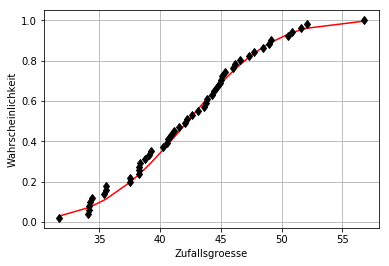

In [13]:
# %load example_KSTest.py
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
def cumulatives(x):
    xbar = np.mean(x)
    s = np.std(x, ddof=1)
    J = len(x)
    xsort = np.sort(x)
    H = np.arange(1,J+1)/J;
    z = (xsort - xbar)/s
    # The cumulative of the unit normal distribution is given 
    # by Phi(z) = 1/2[1 + erf(z/sqrt(2))]
    P = 0.5 * (1 + scipy.special.erf(z/np.sqrt(2)))
    return P, H, xsort, xbar, s
#
# Hauptprogramm
#
# generiere synthetische Stichprobe
stichprobenumfang = 51
mu_1 = 42
sigma_1 = 5
stichprobe = np.random.normal(mu_1, sigma_1, stichprobenumfang)
# 
# Aufgabenstellung Hypothesentest
alpha = 0.05
print('pruefe auf einem Signifikanzniveau von alpha = ', alpha*100, '% die Hypothese')
print('H0: Die Stichprobe ist normalverteilt')
#
# Durchfuehrung des Kolmogorow-Smirnow-Tests:
#
# Berechnung der kumulativen Normalverteilung P und der empirischen
# kumulativen Verteilung der Stichprobe H
P, H, xsort, xbar, s = cumulatives(stichprobe)
#
# Berechnung der Pruef- oder Testgroesse
Testgroesse = np.max(np.abs(H - P))
#
# Berechnung des Schwellwertes 
K_alphaJ = np.sqrt(-np.log(alpha/2)/(2*stichprobenumfang))
#
# Antwortsatz
if (Testgroesse > K_alphaJ):
    print("{:1.2f}".format(Testgroesse), ' > ', "{:1.2f}".format(K_alphaJ), ' ==> Die Nullhypothese H0 wird verworfen')
else:
    print("{:1.2f}".format(Testgroesse), ' < oder = ', "{:1.2f}".format(K_alphaJ), ' ==> Die Nullhypothese H0 wird akzeptiert')
#
# graphische Darstellung
plt.figure(1)
plt.plot(xsort, P, 'r-')
plt.plot(xsort, H, 'kd')
plt.grid()
plt.xlabel('Zufallsgroesse')
plt.ylabel('Wahrscheinlichkeit')
plt.show()

## 2. t-Test
Quantile der kumulierten Wahrscheinlichkeitsdichtefunktion cdf werden auch _Percent point function_, _inverse of cdf_  oder _percentiles_ genannt

In [10]:
import numpy as np
import scipy.stats
bar_y1 = 40.79
bar_y2 = 43.08
s1 = 4.83
s2 = 5.52
J1 = 50
J2 = 50
alpha = 0.05
nu = J1 + J2 - 2
T = (bar_y1 - bar_y2) / np.sqrt(s1**2/J1 + s2**2/J2)
t_nu_alphahalbe = scipy.stats.t.ppf(1-alpha/2, nu, 0, 1)
if (np.abs(T) < t_nu_alphahalbe):
    print('|',"{:1.2f}".format(T), '| < oder gleich ', "{:1.2f}".format(t_nu_alphahalbe), ' ==> H0 annehmen')
else:
    print('|',"{:1.2f}".format(T), '| > ', "{:1.2f}".format(t_nu_alphahalbe), ' ==> H0 verwerfen')

| -2.21 | >  1.98  ==> H0 verwerfen


## 3. Berechnung der Quantile in Python für Chi2-Test und F-Test

In [8]:
J1 = 50
J2 = 50
nu1 = J1 - 1
nu2 = J2 - 1
alpha = 0.05
chi2_links = scipy.stats.chi2.ppf(alpha/2, nu1)
chi2_rechts = scipy.stats.chi2.ppf(1-alpha/2, nu1)
print("{:.2f}".format(chi2_links), "{:.2f}".format(chi2_rechts))
Frechts = scipy.stats.f.ppf(1-alpha/2, nu1, nu2)
Flinks = scipy.stats.f.ppf(alpha/2, nu1, nu2)
print('Prüfgröße T = ', "{:.2f}".format(s1**2/s2**2))
print('Quantile der Fisherverteilung: ', "{:.2f}".format(Flinks), "{:.2f}".format(Frechts))

31.55 70.22
Prüfgröße T =  0.77
Quantile der Fisherverteilung:  0.57 1.76


## 4. Statistische Momente - Vergleich t-Verteilung vs. Gaussverteilung

             t-Vert. Gauss
Standardabw:  1.25    1.00
Kurtosis:     3.97    3.00


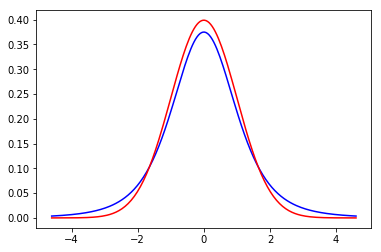

In [14]:
nu = 4
x = np.linspace(scipy.stats.t.ppf(0.005, nu), scipy.stats.t.ppf(0.995, nu), 200)
p_t = scipy.stats.t.pdf(x, nu, 0, 1)
p_g = np.exp(-0.5*x**2) / np.sqrt(2 * np.pi)
plt.figure(7)
plt.plot(x, p_t, 'b-')
plt.plot(x, p_g, 'r-')
s_t = np.sqrt(np.sum(p_t * x**2) / np.sum(p_t))
s_g = np.sqrt(np.sum(p_g * x**2) / np.sum(p_g))
kurt_t = np.sum(p_t * (x/s_t)**4) / np.sum(p_t)
kurt_g = np.sum(p_g * (x/s_g)**4) / np.sum(p_g)
print('             t-Vert. Gauss')
print('Standardabw: ', "{:1.2f}".format(s_t), '  ', "{:1.2f}".format(s_g))
print('Kurtosis:    ', "{:1.2f}".format(kurt_t), '  ', "{:1.2f}".format(kurt_g))

In [ ]:
x_bar = np.array([41.813, 41.854, 39.084, 42.117, 41.532, 40.428, 42.717,\
                 39.727, 40.858, 39.670, 44.351, 42.011, 41.935, 44.509, 39.921])
s_bar = np.array([1.295, 1.541, 1.399, 1.546, 1.286, 1.503, 1.501, 1.488,\
                 1.714, 1.530, 1.216, 1.532, 1.417, 1.576, 1.417])
K = len(x_bar)
nu = 24
alpha = 0.05
tquantil = scipy.stats.t.ppf(1 - alpha/2, nu)
plt.figure(11)
plt.errorbar(np.arange(0, K), x_bar, tquantil*s_bar, ecolor='blue',\
             marker='o', mfc='white', mec='blue', ms=10, mew=1, ls='none')
plt.plot([0, K], [41.502, 41.502], 'r-')
plt.ylabel(r'$\bar x$')
plt.figure(12)
plt.plot(np.arange(0, K), s_bar, 'bo')
plt.plot([0, K], [1.606, 1.606], 'r-')
plt.ylabel(r'$\bar s$')